In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pathlib

In [2]:
import tensorflow as tf

In [6]:
data_dir = "Dataset/"
path_dir = pathlib.Path("Dataset/") 
class_names = np.array(sorted([item.name for item in path_dir.glob('*')]))
class_names

array(['Mild_Demented', 'Moderate_Demented', 'Non_Demented',
       'Very_Mild_Demented'], dtype='<U18')

In [4]:
# For replicable results
SEED = 0
# Size of the images is (128,128)
IMAGE_SIZE = (128, 128)
# Default batch size
BATCH_SIZE = 32
# Images are grayscale
COLOR_MODE = "grayscale"
# 20% test split
VAL_SPLIT = 0.2

tf.random.set_seed(SEED)
np.random.seed(SEED)
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    label_mode='categorical',
    validation_split=VAL_SPLIT,
    subset="training",
    seed=SEED,
    color_mode=COLOR_MODE,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
)
valid_data = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=VAL_SPLIT,
    subset="validation",
    label_mode='categorical',
    seed=SEED,
    color_mode=COLOR_MODE,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
)

Found 6400 files belonging to 4 classes.
Using 5120 files for training.
Found 6400 files belonging to 4 classes.
Using 1280 files for validation.


Text(0.5, 1.0, 'Mild_Demented')

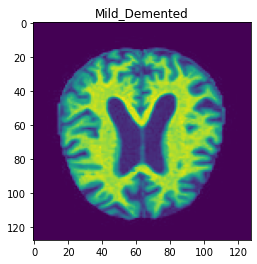

In [21]:
img = mpimg.imread("Dataset\Mild_Demented\mild.jpg")
plt.imshow(img)
plt.title("Mild_Demented")

In [31]:
def model(inputs):
    # first Conv layer
    x = tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = tf.keras.layers.Dropout(0.1)(x)
    
    # 2 Conv layer
    x = tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = tf.keras.layers.Dropout(0.1)(x)
    
    # 3 Conv layer
    x = tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = tf.keras.layers.Dropout(0.1)(x)
    
    # 4 Conv layer
    x = tf.keras.layers.Conv2D(254, kernel_size=(3, 3), activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = tf.keras.layers.Dropout(0.1)(x)
    
    # 5 Conv layer
    x = tf.keras.layers.Conv2D(508, kernel_size=(3, 3), activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = tf.keras.layers.Dropout(0.1)(x)
    
    # 1 Den layer
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(512, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.1)(x)
    
    # 1 Den layer
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(4, activation='softmax')(x)
    
    model = tf.keras.models.Model(inputs=inputs, outputs=x)
    
    return model

In [32]:
inputs = tf.keras.layers.Input((128,128,1))
model = model(inputs)

In [33]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 128, 128, 1)]     0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 126, 126, 32)      320       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 30, 30, 64)        0     

In [34]:
model.compile(loss="categorical_crossentropy", 
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
                metrics=["accuracy"])

In [39]:
history = model.fit(train_data,
                      validation_data=valid_data,
                    batch_size =100,
                      epochs=10)

Epoch 1/10
160/160 [==============================] - 162s 1s/step - loss: 0.6847 - accuracy: 0.6906 - val_loss: 0.5715 - val_accuracy: 0.7539
Epoch 2/10
160/160 [==============================] - 162s 1s/step - loss: 0.6044 - accuracy: 0.7303 - val_loss: 0.5999 - val_accuracy: 0.7328
Epoch 3/10
160/160 [==============================] - 162s 1s/step - loss: 0.5309 - accuracy: 0.7727 - val_loss: 0.4484 - val_accuracy: 0.8078
Epoch 4/10
160/160 [==============================] - 162s 1s/step - loss: 0.4742 - accuracy: 0.7965 - val_loss: 0.4209 - val_accuracy: 0.8156
Epoch 5/10
160/160 [==============================] - 162s 1s/step - loss: 0.3902 - accuracy: 0.8363 - val_loss: 0.3036 - val_accuracy: 0.8828
Epoch 6/10
160/160 [==============================] - 162s 1s/step - loss: 0.3302 - accuracy: 0.8631 - val_loss: 0.3659 - val_accuracy: 0.8477
Epoch 7/10
160/160 [==============================] - 163s 1s/step - loss: 0.3074 - accuracy: 0.8809 - val_loss: 0.2636 - val_accuracy: 0.9000

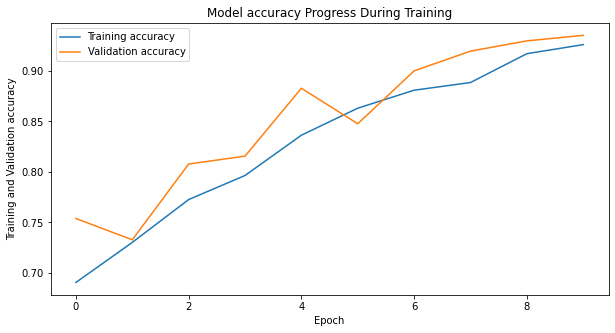

In [43]:
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation accuracy')
plt.legend(['Training accuracy', 'Validation accuracy'])

note : we can use more epochs

dataset : https://www.kaggle.com/datasets/sachinkumar413/alzheimer-mri-dataset